In [1]:
# imports
import numpy as np
import random as rnd
import p4_aux as p4

# Ejercicio 1

In [2]:
# Ejercicio 1c
np.random.seed(1234)

def shuffle_match(n):
    mazo = np.arange(n)
    perm = list(np.random.permutation(mazo))
    return [ i == e for i, e in enumerate(perm)]

print("Match 1 to 10")
for e in [2,3,4,5,6]:
    nsim = 10**e
    acc = 0
    for _ in range(nsim):
        deck = shuffle_match(100)
        acc += sum(deck[:10]) == 10  # ignores 11:100
    print(f'{nsim:7} | {acc/nsim}')

print("\nMatch only 1 to 10")
for e in [2,3,4,5,6]:
    nsim = 10**e
    acc = 0
    for _ in range(nsim):
        deck = shuffle_match(100)
        acc += sum(deck[:10]) == 10 and sum(deck) == 10 # only matches at :10
    print(f'{nsim:7} | {acc/nsim}')

Match 1 to 10
    100 | 0.0
   1000 | 0.0
  10000 | 0.0
 100000 | 0.0
1000000 | 0.0

Match only 1 to 10
    100 | 0.0
   1000 | 0.0
  10000 | 0.0
 100000 | 0.0
1000000 | 0.0


# Ejercicio 2

Con $N=10.000$, queremos aproximar
$$S = \sum^N_{k=1}e^{k/ N}$$

Tomamos $g(i) = exp(i/N)$ y queremos estimar $E[g(X)]$ con $X\sim U(1,10000)$

$$\begin{align}
S &= N * {1\over N} * \sum^N_{k=1}e^{k/ N} \\
S &= N * {1\over N} \sum^N_{k=1}g(x) \\
S &\simeq N * E[g(X)]
\end{align}
$$

In [3]:
# Ejercicio 2
import numpy as np
from random import random, seed
N = 10**4

g = lambda x: np.exp(x/N)

def dos_a():
    seed(1234)
    acc = 0
    for i in range(10000):
        acc += g(i+1)
    return acc

def dos_c(nsim):
    seed(1234)
    acc = 0
    for i in range(nsim):
        acc += g(i+1)
    return acc

def dos_b(nsim):
    seed(1234)
    acc = 0
    for _ in range(nsim):
        u = int(random()*N) + 1 # Uniforme [1,10000]
        acc += g(u)
    return acc/nsim * N


In [4]:
dos_a()

17183.677439823703

In [5]:
dos_b(100)

16514.784333287567

In [6]:
dos_c(100)

100.50669600897406

# Ejercicio 3

In [7]:
# Ejercicio 3
from p3_aux import dice_dn
rnd.seed(1234)

MAX_SIM = 10**6

def inner():
    res = {}
    acc = 0
    while len(res) < 11 and acc < MAX_SIM:
        acc += 1 
        r = dice_dn(6) +  dice_dn(6)
        res[r] = 1 + res.get(r, 0)
    return acc

def outer():
    print(' nsim  |  V Medio | Desviacion ')
    for e in [2,3,4,5]:
        nsim = 10**e
        acc = []
        for _  in range(nsim):
            acc.append(inner())
        print(f'{nsim:6} | {np.mean(acc):8.7} | {np.std(acc):7.7} ')

outer()


 nsim  |  V Medio | Desviacion 
   100 |    56.16 | 31.5486 
  1000 |   60.664 | 33.92314 
 10000 |  60.7926 | 35.23579 
100000 | 60.97358 | 35.91578 


In [8]:
# Ejercicio 3bii
rnd.seed(16661)
def outer():
    print(' nsim  |  P(N >= 15) | P(N <= 9) ')
    for e in [2,3,4,5]:
        nsim = 10**e
        acc15 = 0
        acc9 = 0
        for _  in range(nsim):
            r = inner()
            acc15 += 1 if r >= 15 else 0
            acc9  += 1 if r <= 9  else 0
        print(f'{nsim:6} | {acc15/nsim:11.3} | {acc9/nsim:8.3}')

outer()

 nsim  |  P(N >= 15) | P(N <= 9) 
   100 |        0.99 |      0.0
  1000 |         1.0 |      0.0
 10000 |       0.999 |      0.0
100000 |       0.999 |      0.0


# Ejercicio 4

In [49]:
# Ejercicio 4
from random import random
C = 0.14 # /0.1

def var_rech(probs : list):
    ''' implementacion usando el metodo de rechazo
        TODO: 
    '''
    ret = None
    while ret is None:
        y = int(random() * 10) # Simular Y 1/10
        u = random()
        # c = 1.4 = 0.14 / 0.1  Luego c * q(y) = c * 0.1 = 0.14
        valid = u < probs[y] / max(probs) 
        ret = y + 1 if valid else None
    return ret

def var_tinv(probs : dict):
    ''' Implementacion usando transformacion invertida 
    '''
    u = random()
    f = 0
    for k, v in probs.items():
        f += v
        if u <= f:
            return k

def _gen_urna(probs):
    res = []
    for i in range(len(probs)):
        res += [i+1]*int(probs[i]*100)
    return res

def var_urna(urna : list):
    ''' Implementacion usando el metodo de la variable invertida
    '''
    u = int(random() * 100)
    return urna[u]


In [96]:
from random import seed
import time 

def get_probs(g, nsim, *args):
    seed(1811)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf


Expected: {1: 0.11, 2: 0.14, 3: 0.09, 4: 0.08, 5: 0.12, 6: 0.1, 7: 0.09, 8: 0.07, 9: 0.11, 10: 0.09}
Rechazo   
Got:	  {1: 0.1153, 2: 0.1361, 3: 0.0846, 4: 0.0828, 5: 0.1206, 6: 0.0955, 7: 0.095, 8: 0.0768, 9: 0.1061, 10: 0.0872}
Invertida 
Got:	  {1: 0.1142, 2: 0.1413, 3: 0.0921, 4: 0.0755, 5: 0.1194, 6: 0.0917, 7: 0.0916, 8: 0.0707, 9: 0.1114, 10: 0.0921}
Urna      
Got:	  {1: 0.1099, 2: 0.1405, 3: 0.096, 4: 0.078, 5: 0.1177, 6: 0.097, 7: 0.0928, 8: 0.0748, 9: 0.1053, 10: 0.088}


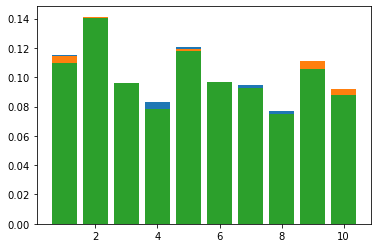

In [109]:
import matplotlib.pyplot as plt
P = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
PROBS_IDX = { k: v for k, v in zip(range(1,len(P)+1),P)}
sort = sorted((PROBS_IDX.items()), key = lambda x: x[1], reverse=True)
P_ORD = dict(sort)

funs = [
    ('Rechazo   ',var_rech, P), 
    ('Invertida ',var_tinv, P_ORD),
    ('Urna      ',var_urna, _gen_urna(P)),
    ]

for n, g, v in funs:
    print(n)
    # print('Expected:',PROBS_IDX)
    # print(75*'-')
    acc, perf = get_probs(g,10_000, v)
    print('Got:\t ', acc)
    # print('Perf:\t  ', perf)
    plt.bar(acc.keys(),acc.values(), )
    
plt.show()


# Ejercicio 5

In [81]:
from random import random, seed
def bin_inv(n,p):
    ''' F(i)    = p(i) + F(i-1)
        
        p(0)    = (1-p)**n
        p(i+1)  = p(i) * (n-i) * (i+1)
    '''
    c = p / (1-p)
    prob = (1-p)**N
    f, i = prob, 0
    u = random()
    while f >= u:
        prob *= c * (n-i) * (i+1)
        f += prob
        i += 1 
    return i

def bin_sim(n,p):
    '''  
    '''
    i = 0
    for _ in range(n):
        u = random()
        if u > p:
            i += 1
    return i

import time 

def get_probs(g, nsim, *args):
    seed(1000)
    acc = {}

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = time.perf_counter()

    print(f'Perf: {end - start}')
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    print(acc)
    return acc

In [82]:
N = 10
P = 0.3
funs = [
    (),
    (,)
]

acc = get_probs(bin_sim,10_000,N,P)

Perf: 0.040325279999706254
{2: 0.0014, 3: 0.0083, 4: 0.0353, 5: 0.1016, 6: 0.2007, 7: 0.2622, 8: 0.2435, 9: 0.1203, 10: 0.0267}
